#Perform the following exploratory data analysis (EDA) on the 'titanic' dataset from the seaborn library and upload your notebook file.

1)Calculate the percentage of missing values in each column.
2)Handle missing values if any are present by either filling or dropping them. 
3)Generate summary statistics for both numerical and categorical columns.
4)Plot a histogram to observe the distribution of the age column.
5)Use a boxplot to identify outliers in the fare and age columns.
6)Calculate and visualize the correlation between numerical columns using a heatmap. 
7)Find the average fare for each class and compare across categories.
8)Create a scatter plot to visualize the relationship between fare and age.

In [2]:
#Import Libriaries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Load & Display Dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Finding Missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [6]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
#1) Calculate the Percentage of Missing Values in Each Column
missing_values = titanic.isnull().mean() * 100
missing_values = missing_values[missing_values > 0] 
print(missing_values)


age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64


In [10]:
#2)Handle Missing Values by dropping missing values
titanic_cleaned = titanic.dropna()

In [11]:
# Check the shape to confirm rows were dropped
print("Original dataset shape:", titanic.shape)
print("Cleaned dataset shape:", titanic_cleaned.shape)


Original dataset shape: (891, 15)
Cleaned dataset shape: (182, 15)


In [12]:
#3) Generate Summary Statistics for Numerical and Categorical Columns
# Numerical summary statistics
print("Numerical Columns Summary:\n")
print(titanic_cleaned.describe())

# Categorical summary statistics
print("\nCategorical Columns Summary:\n")
print(titanic_cleaned.describe(include='object'))


Numerical Columns Summary:

         survived      pclass         age       sibsp       parch        fare
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean     0.675824    1.192308   35.623187    0.467033    0.478022   78.919735
std      0.469357    0.516411   15.671615    0.645007    0.755869   76.490774
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.750000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200

Categorical Columns Summary:

         sex embarked  who  embark_town alive
count    182      182  182          182   182
unique     2        3    3            3     2
top     male        S  man  Southampton   yes
freq      94      115   87          115   123


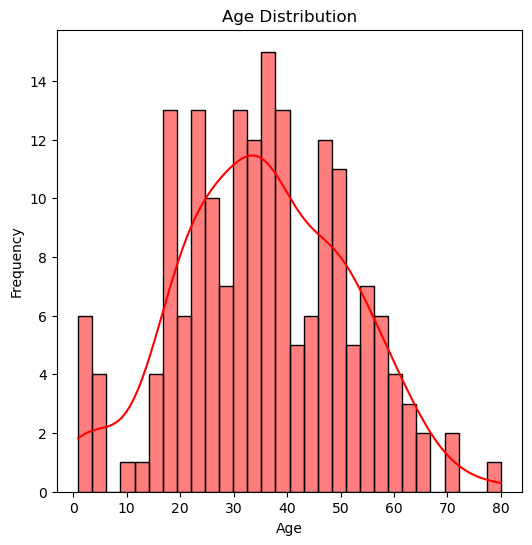

In [13]:
#4) Plot a Histogram for the Distribution of the age Column
plt.figure(figsize=(6, 6))
sns.histplot(titanic_cleaned['age'], bins=30, kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

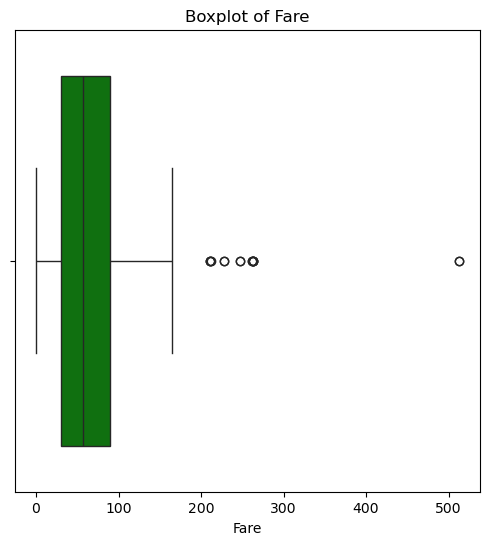

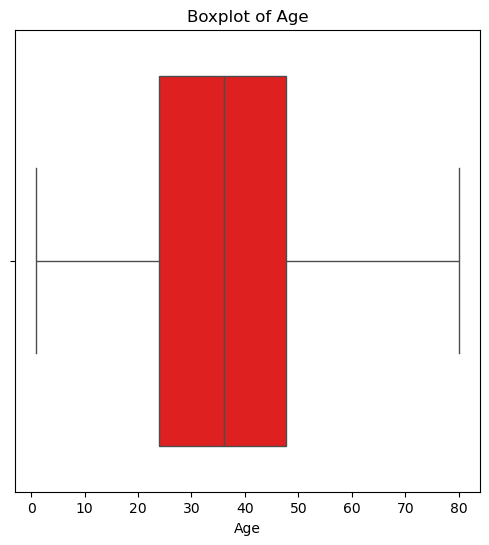

In [14]:
#5) Boxplot to Identify Outliers in the fare and age Columns
# Boxplot for 'fare'
plt.figure(figsize=(6, 6))
sns.boxplot(x=titanic_cleaned['fare'], color='green')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

# Boxplot for 'age'
plt.figure(figsize=(6, 6))
sns.boxplot(x=titanic_cleaned['age'], color='red')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()



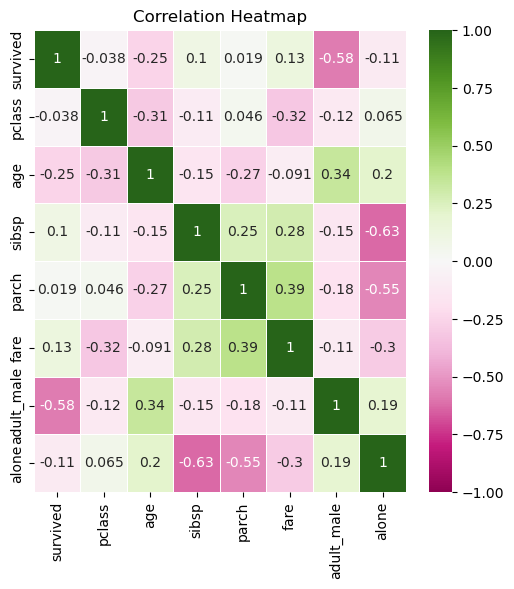

In [15]:
#6) Correlation Between Numerical Columns (Heatmap)
# Compute correlation matrix
corr_matrix = titanic_cleaned.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Average Fare by Passenger Class:
 pclass
1    89.021975
2    18.444447
3    11.027500
Name: fare, dtype: float64


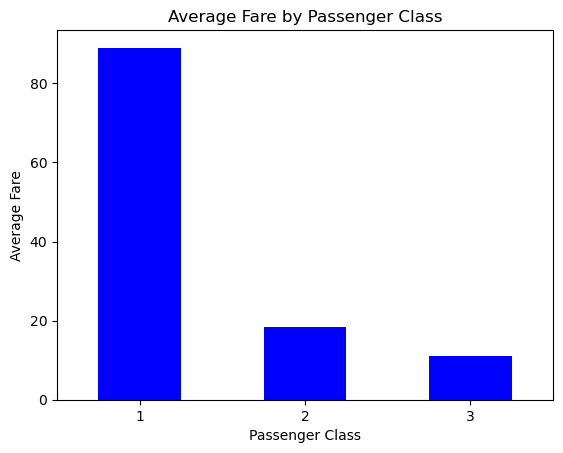

In [16]:
#7)Average Fare for Each Class and Compare Across Categories
# Group by passenger class and calculate average fare
avg_fare_by_class = titanic_cleaned.groupby('pclass')['fare'].mean()
print("Average Fare by Passenger Class:\n", avg_fare_by_class)

# Bar chart
avg_fare_by_class.plot(kind='bar', color='blue')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


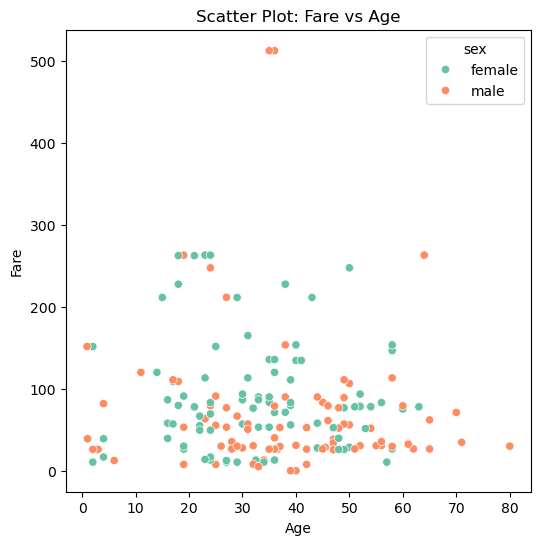

In [17]:
#8)Scatter Plot to Visualize Relationship Between fare and age
plt.figure(figsize=(6, 6))
sns.scatterplot(data=titanic_cleaned, x='age', y='fare', hue='sex', palette='Set2')
plt.title('Scatter Plot: Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Conclusion:

As part of a comprehensive Exploratory Data Analysis (EDA) of the Titanic dataset, I began by addressing missing values to enhance data reliability. I conducted descriptive statistical analysis on both numerical and categorical variables, followed by visualizations to assess distributions and detect outliers—particularly in the "Age" and "Fare" columns. A correlation heatmap revealed that male passengers and those traveling alone were less likely to survive, while being female and younger was positively associated with survival. Out of 891 passengers, 342 survived, indicating an overall survival rate of approximately 38.4%. Fare prices varied significantly across passenger classes, reflecting socio-economic disparities. Additionally, a scatter plot between "Age" and "Fare" indicated no strong linear relationship, suggesting these variables were largely independent. Overall, the analysis highlights key demographic factors—especially gender and age—as influential in determining survival outcomes during the Titanic disaster.